In [2]:
from src.data_helper import create_dataset
from src.models.bagging import BaggingModel
from src.models.decision_tree import DecisionTree
from src.models.random_forest import RandomForest
from src.plot_helper import plot_everything


weights = {
    'balanced': (0.5, 0.5),
    'quarter_skew': (0.75, 0.25),
    'ninety_skew': (0.90, 0.10),
    'ninety-nine_skew': (0.99, 0.01),
}

def main(weight):
    for key, value in weight.items():
        X, y, X_columns = create_dataset(
            n_samples=1000,
            weights=value,
            n_classes=2,
        )

        DecisionTree(X, y, X_columns, ['majority', 'minority'], key).run()
        BaggingModel(X, y, X_columns, ['majority', 'minority'], key).run()
        RandomForest(X, y, X_columns, ['majority', 'minority'], key).run()

        resampled_data = plot_everything(X, y)

        for resample in resampled_data:
            DecisionTree(resample.X_res, resample.y_res, X_columns, ['majority', 'minority'], key).run()
            BaggingModel(resample.X_res, resample.y_res, X_columns, ['majority', 'minority'], key).run()
            RandomForest(resample.X_res, resample.y_res, X_columns, ['majority', 'minority'], key).run()

    

balanced
balanced
balanced


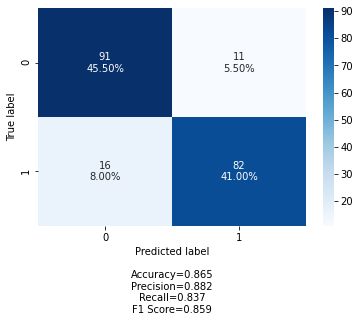

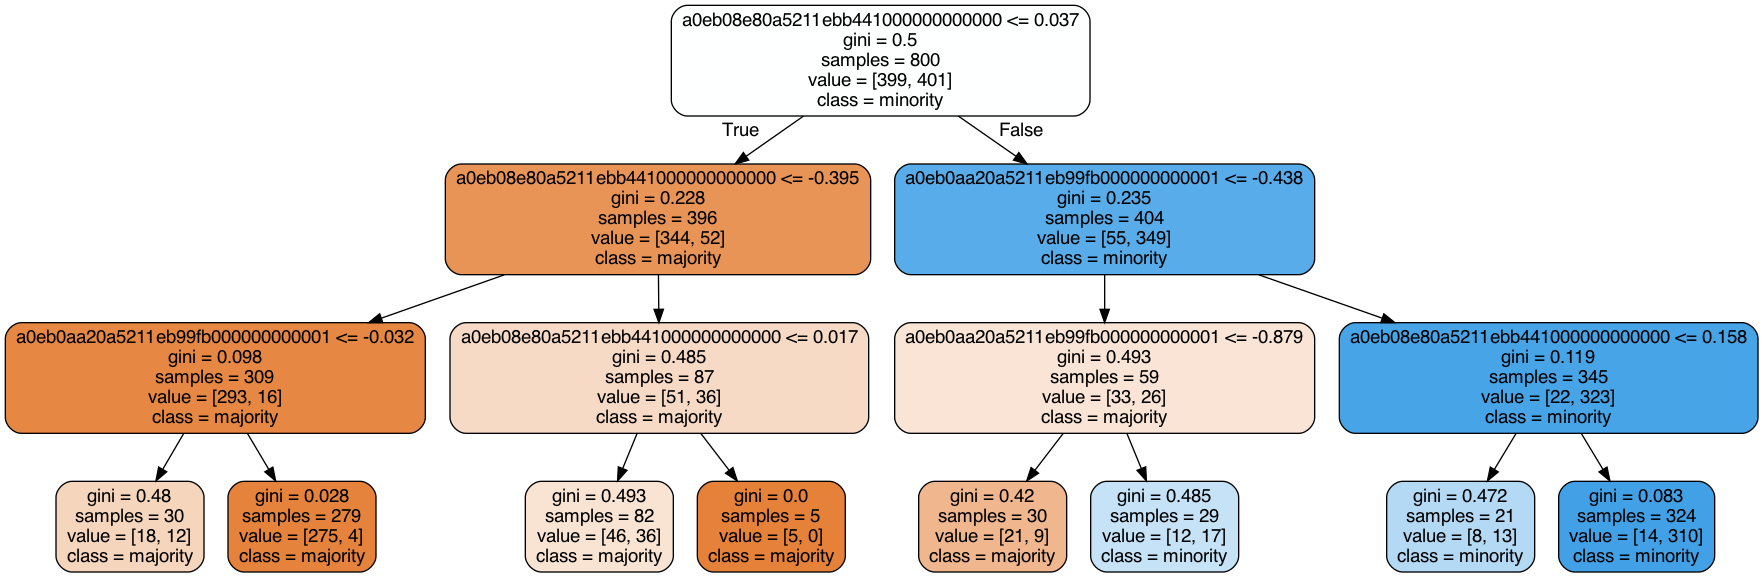

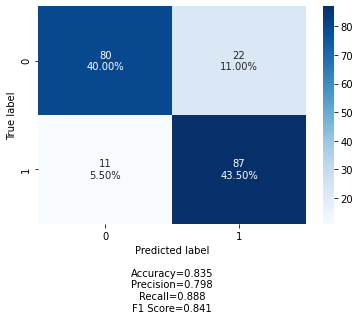

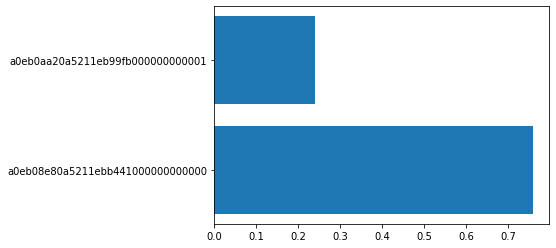

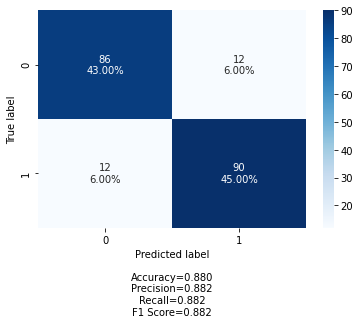

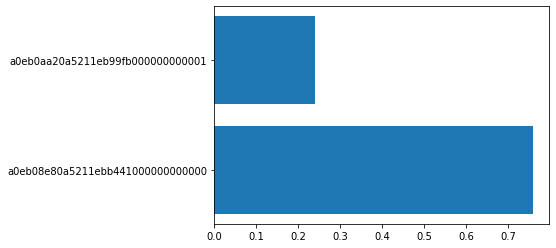

ValueError: No samples will be generated with the provided ratio settings.

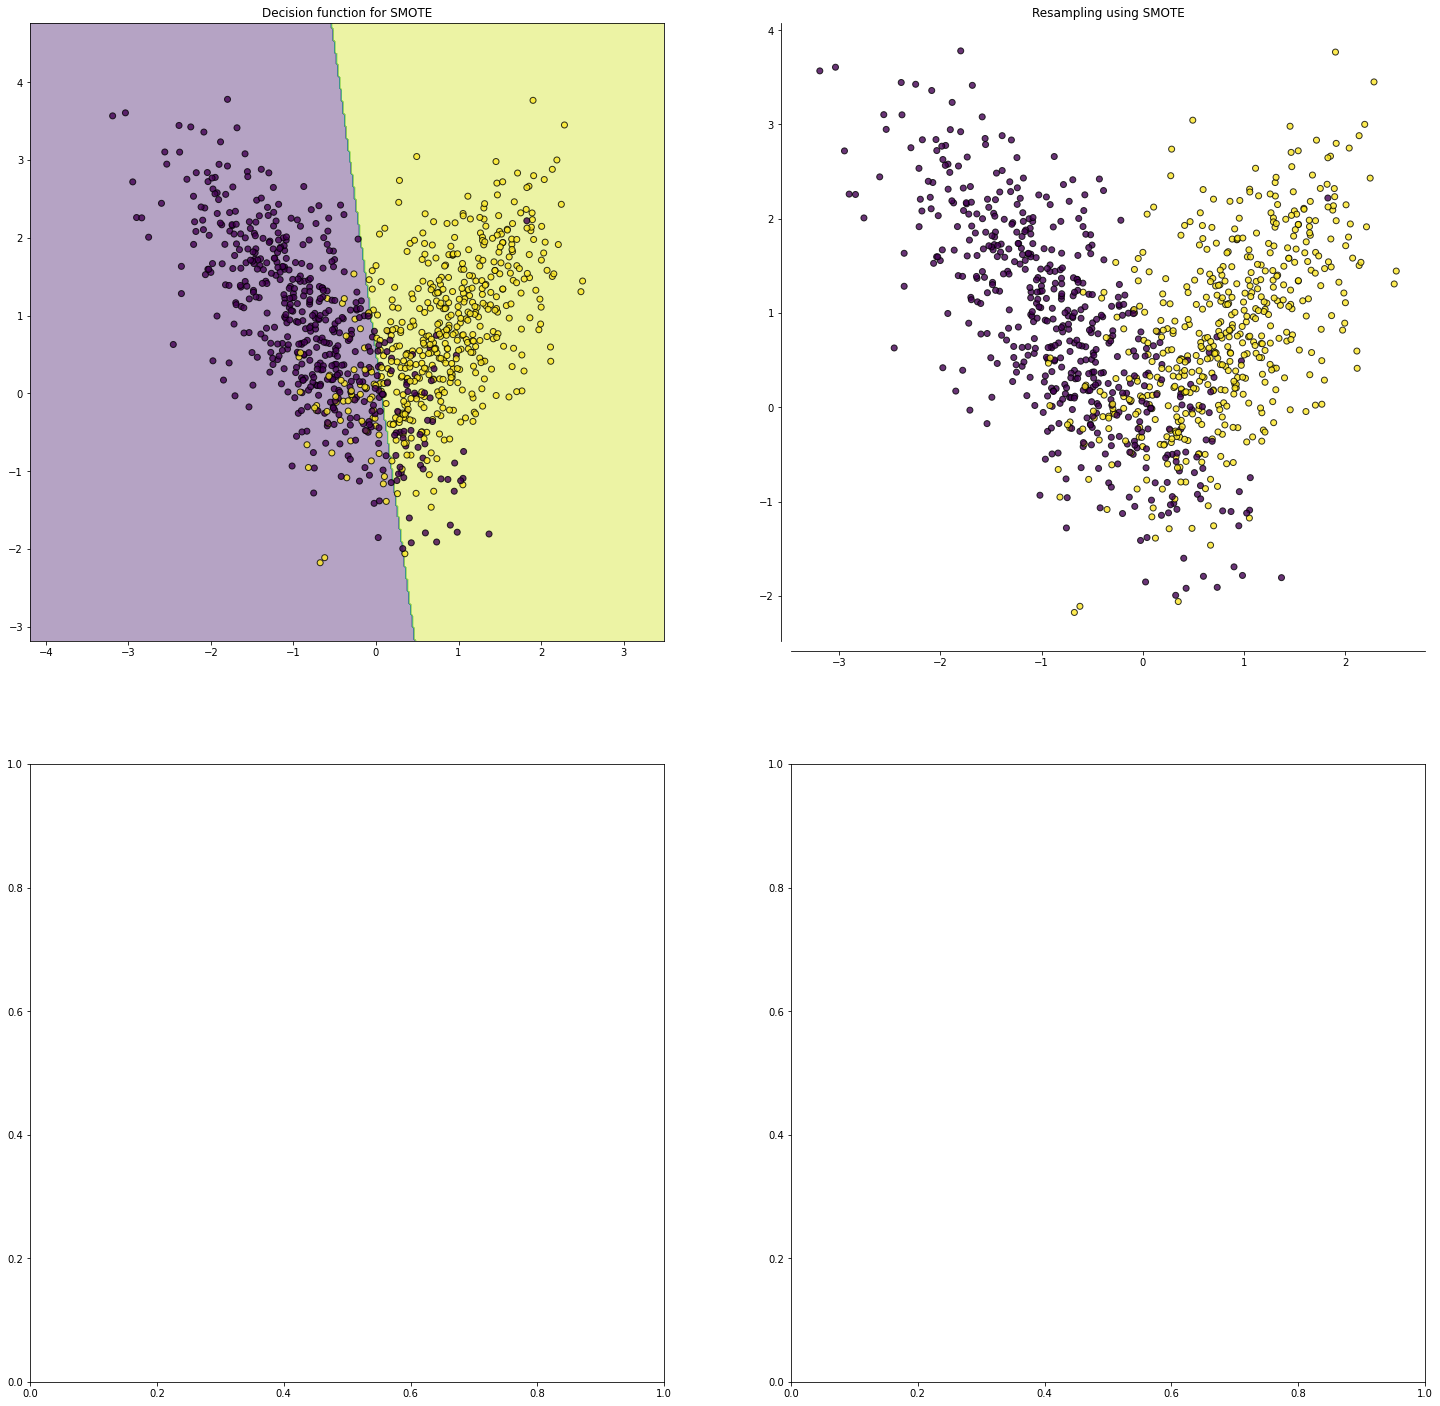

In [4]:
main(weights)
